In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [25]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os 
import cv2
import random
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
import pathlib

In [7]:
#!unzip /content/gdrive/MyDrive/bangkit/model/DatasetV2Trimmed5.zip
!unzip /content/gdrive/MyDrive/bangkit/model/DatasetV2Trimmed5.zip

Archive:  /content/gdrive/MyDrive/bangkit/model/DatasetV2Trimmed5.zip
replace DatasetV2Trimmed5/Glass_ClearGlass/white-glass1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [11]:
base_dir="/content/DatasetV2Trimmed5"
os.listdir('/content/DatasetV2Trimmed5')

['Glass_ClearGlass',
 'Textiles_Textiles',
 'Metal_AluminiumCans',
 'Paper_Paper',
 'Plastic_PET']

In [12]:
IMAGE_SIZE=224
BATCH_SIZE=50

train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    horizontal_flip=True,
)

test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_datagen=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

test_datagen=test_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
  
)


Found 6796 images belonging to 5 classes.
Found 678 images belonging to 5 classes.


In [13]:
class_indices = train_datagen.class_indices
class_labels = list(class_indices.keys())

print("Class Indices:", class_indices)
print("Class Labels:", class_labels)

Class Indices: {'Glass_ClearGlass': 0, 'Metal_AluminiumCans': 1, 'Paper_Paper': 2, 'Plastic_PET': 3, 'Textiles_Textiles': 4}
Class Labels: ['Glass_ClearGlass', 'Metal_AluminiumCans', 'Paper_Paper', 'Plastic_PET', 'Textiles_Textiles']


In [14]:
#Will do transfer learning from Xception

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax') #Change this according to number of classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [15]:
#callbacks
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'model_checkpoint,h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
    verbose=1
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True,
)

In [16]:
history = model.fit(
    train_datagen,
    epochs=40,
    validation_data=test_datagen,
    callbacks=[checkpoint, early_stopping])

Epoch 1/40
136/136 [==============================] - ETA: 0s - loss: 1.2984 - accuracy: 0.4432
Epoch 1: val_loss improved from inf to 1.18348, saving model to model_checkpoint,h5


136/136 [==============================] - 215s 1s/step - loss: 1.2984 - accuracy: 0.4432 - val_loss: 1.1835 - val_accuracy: 0.5059
Epoch 2/40
136/136 [==============================] - ETA: 0s - loss: 0.9867 - accuracy: 0.5915
Epoch 2: val_loss improved from 1.18348 to 0.88165, saving model to model_checkpoint,h5


136/136 [==============================] - 197s 1s/step - loss: 0.9867 - accuracy: 0.5915 - val_loss: 0.8816 - val_accuracy: 0.6121
Epoch 3/40
136/136 [==============================] - ETA: 0s - loss: 0.8623 - accuracy: 0.6460
Epoch 3: val_loss improved from 0.88165 to 0.76854, saving model to model_checkpoint,h5


136/136 [==============================] - 194s 1s/step - loss: 0.8623 - accuracy: 0.6460 - val_loss: 0.7685 - val_accuracy: 0.7094
Epoch 4/40
136/136 [==============================] - ETA: 0s - loss: 0.7961 - accuracy: 0.6801
Epoch 4: val_loss did not improve from 0.76854
136/136 [==============================] - 194s 1s/step - loss: 0.7961 - accuracy: 0.6801 - val_loss: 0.7883 - val_accuracy: 0.6652
Epoch 5/40
136/136 [==============================] - ETA: 0s - loss: 0.7477 - accuracy: 0.7009
Epoch 5: val_loss improved from 0.76854 to 0.69925, saving model to model_checkpoint,h5


136/136 [==============================] - 193s 1s/step - loss: 0.7477 - accuracy: 0.7009 - val_loss: 0.6993 - val_accuracy: 0.7183
Epoch 6/40
136/136 [==============================] - ETA: 0s - loss: 0.7192 - accuracy: 0.7095
Epoch 6: val_loss improved from 0.69925 to 0.69328, saving model to model_checkpoint,h5


136/136 [==============================] - 194s 1s/step - loss: 0.7192 - accuracy: 0.7095 - val_loss: 0.6933 - val_accuracy: 0.6858
Epoch 7/40
136/136 [==============================] - ETA: 0s - loss: 0.6736 - accuracy: 0.7331
Epoch 7: val_loss improved from 0.69328 to 0.67029, saving model to model_checkpoint,h5


136/136 [==============================] - 197s 1s/step - loss: 0.6736 - accuracy: 0.7331 - val_loss: 0.6703 - val_accuracy: 0.7404
Epoch 8/40
136/136 [==============================] - ETA: 0s - loss: 0.7471 - accuracy: 0.7063
Epoch 8: val_loss improved from 0.67029 to 0.62411, saving model to model_checkpoint,h5


136/136 [==============================] - 198s 1s/step - loss: 0.7471 - accuracy: 0.7063 - val_loss: 0.6241 - val_accuracy: 0.7861
Epoch 9/40
136/136 [==============================] - ETA: 0s - loss: 0.6531 - accuracy: 0.7456
Epoch 9: val_loss improved from 0.62411 to 0.56499, saving model to model_checkpoint,h5


136/136 [==============================] - 198s 1s/step - loss: 0.6531 - accuracy: 0.7456 - val_loss: 0.5650 - val_accuracy: 0.7758
Epoch 10/40
136/136 [==============================] - ETA: 0s - loss: 0.6652 - accuracy: 0.7366
Epoch 10: val_loss did not improve from 0.56499
136/136 [==============================] - 192s 1s/step - loss: 0.6652 - accuracy: 0.7366 - val_loss: 0.6272 - val_accuracy: 0.7212
Epoch 11/40
136/136 [==============================] - ETA: 0s - loss: 0.5958 - accuracy: 0.7675
Epoch 11: val_loss did not improve from 0.56499
136/136 [==============================] - 192s 1s/step - loss: 0.5958 - accuracy: 0.7675 - val_loss: 0.6465 - val_accuracy: 0.7316
Epoch 12/40
136/136 [==============================] - ETA: 0s - loss: 0.5976 - accuracy: 0.7656
Epoch 12: val_loss improved from 0.56499 to 0.54083, saving model to model_checkpoint,h5


136/136 [==============================] - 193s 1s/step - loss: 0.5976 - accuracy: 0.7656 - val_loss: 0.5408 - val_accuracy: 0.7788
Epoch 13/40
136/136 [==============================] - ETA: 0s - loss: 0.5498 - accuracy: 0.7850
Epoch 13: val_loss did not improve from 0.54083
136/136 [==============================] - 193s 1s/step - loss: 0.5498 - accuracy: 0.7850 - val_loss: 0.5624 - val_accuracy: 0.7552
Epoch 14/40
136/136 [==============================] - ETA: 0s - loss: 0.5279 - accuracy: 0.8003
Epoch 14: val_loss improved from 0.54083 to 0.48958, saving model to model_checkpoint,h5


136/136 [==============================] - 192s 1s/step - loss: 0.5279 - accuracy: 0.8003 - val_loss: 0.4896 - val_accuracy: 0.8009
Epoch 15/40
136/136 [==============================] - ETA: 0s - loss: 0.5139 - accuracy: 0.7983
Epoch 15: val_loss did not improve from 0.48958
136/136 [==============================] - 190s 1s/step - loss: 0.5139 - accuracy: 0.7983 - val_loss: 0.5989 - val_accuracy: 0.7375
Epoch 16/40
136/136 [==============================] - ETA: 0s - loss: 0.4924 - accuracy: 0.8106
Epoch 16: val_loss improved from 0.48958 to 0.45005, saving model to model_checkpoint,h5


136/136 [==============================] - 192s 1s/step - loss: 0.4924 - accuracy: 0.8106 - val_loss: 0.4500 - val_accuracy: 0.8304
Epoch 17/40
136/136 [==============================] - ETA: 0s - loss: 0.4915 - accuracy: 0.8103
Epoch 17: val_loss did not improve from 0.45005
136/136 [==============================] - 195s 1s/step - loss: 0.4915 - accuracy: 0.8103 - val_loss: 0.5012 - val_accuracy: 0.7817
Epoch 18/40
136/136 [==============================] - ETA: 0s - loss: 0.4718 - accuracy: 0.8156
Epoch 18: val_loss did not improve from 0.45005
136/136 [==============================] - 192s 1s/step - loss: 0.4718 - accuracy: 0.8156 - val_loss: 0.4583 - val_accuracy: 0.8053
Epoch 19/40
136/136 [==============================] - ETA: 0s - loss: 0.4856 - accuracy: 0.8147
Epoch 19: val_loss did not improve from 0.45005
136/136 [==============================] - 195s 1s/step - loss: 0.4856 - accuracy: 0.8147 - val_loss: 0.5157 - val_accuracy: 0.7802
Epoch 20/40
136/136 [================

136/136 [==============================] - 190s 1s/step - loss: 0.4405 - accuracy: 0.8273 - val_loss: 0.3732 - val_accuracy: 0.8687
Epoch 21/40
136/136 [==============================] - ETA: 0s - loss: 0.4494 - accuracy: 0.8265
Epoch 21: val_loss did not improve from 0.37321
136/136 [==============================] - 191s 1s/step - loss: 0.4494 - accuracy: 0.8265 - val_loss: 0.4807 - val_accuracy: 0.8024
Epoch 22/40
136/136 [==============================] - ETA: 0s - loss: 0.4258 - accuracy: 0.8414
Epoch 22: val_loss did not improve from 0.37321
136/136 [==============================] - 190s 1s/step - loss: 0.4258 - accuracy: 0.8414 - val_loss: 0.4460 - val_accuracy: 0.8422
Epoch 23/40
136/136 [==============================] - ETA: 0s - loss: 0.4288 - accuracy: 0.8402
Epoch 23: val_loss did not improve from 0.37321
136/136 [==============================] - 191s 1s/step - loss: 0.4288 - accuracy: 0.8402 - val_loss: 0.4102 - val_accuracy: 0.8363
Epoch 24/40
136/136 [================

136/136 [==============================] - 196s 1s/step - loss: 0.4028 - accuracy: 0.8474 - val_loss: 0.3691 - val_accuracy: 0.8437
Epoch 26/40
136/136 [==============================] - ETA: 0s - loss: 0.3875 - accuracy: 0.8579
Epoch 26: val_loss did not improve from 0.36912
136/136 [==============================] - 195s 1s/step - loss: 0.3875 - accuracy: 0.8579 - val_loss: 0.3935 - val_accuracy: 0.8201
Epoch 27/40
136/136 [==============================] - ETA: 0s - loss: 0.3857 - accuracy: 0.8574
Epoch 27: val_loss improved from 0.36912 to 0.33454, saving model to model_checkpoint,h5


136/136 [==============================] - 195s 1s/step - loss: 0.3857 - accuracy: 0.8574 - val_loss: 0.3345 - val_accuracy: 0.8746
Epoch 28/40
136/136 [==============================] - ETA: 0s - loss: 0.3849 - accuracy: 0.8517
Epoch 28: val_loss did not improve from 0.33454
136/136 [==============================] - 194s 1s/step - loss: 0.3849 - accuracy: 0.8517 - val_loss: 0.4059 - val_accuracy: 0.8112
Epoch 29/40
136/136 [==============================] - ETA: 0s - loss: 0.3671 - accuracy: 0.8620
Epoch 29: val_loss did not improve from 0.33454
136/136 [==============================] - 194s 1s/step - loss: 0.3671 - accuracy: 0.8620 - val_loss: 0.3519 - val_accuracy: 0.8909
Epoch 30/40
136/136 [==============================] - ETA: 0s - loss: 0.3724 - accuracy: 0.8609
Epoch 30: val_loss improved from 0.33454 to 0.32957, saving model to model_checkpoint,h5


136/136 [==============================] - 202s 1s/step - loss: 0.3724 - accuracy: 0.8609 - val_loss: 0.3296 - val_accuracy: 0.8717
Epoch 31/40
136/136 [==============================] - ETA: 0s - loss: 0.3586 - accuracy: 0.8643
Epoch 31: val_loss improved from 0.32957 to 0.30630, saving model to model_checkpoint,h5


136/136 [==============================] - 195s 1s/step - loss: 0.3586 - accuracy: 0.8643 - val_loss: 0.3063 - val_accuracy: 0.8850
Epoch 32/40
136/136 [==============================] - ETA: 0s - loss: 0.3558 - accuracy: 0.8661
Epoch 32: val_loss did not improve from 0.30630
136/136 [==============================] - 195s 1s/step - loss: 0.3558 - accuracy: 0.8661 - val_loss: 0.3194 - val_accuracy: 0.8687
Epoch 33/40
136/136 [==============================] - ETA: 0s - loss: 0.3419 - accuracy: 0.8743
Epoch 33: val_loss did not improve from 0.30630
136/136 [==============================] - 193s 1s/step - loss: 0.3419 - accuracy: 0.8743 - val_loss: 0.3291 - val_accuracy: 0.8643
Epoch 34/40
136/136 [==============================] - ETA: 0s - loss: 0.3484 - accuracy: 0.8710
Epoch 34: val_loss did not improve from 0.30630
136/136 [==============================] - 193s 1s/step - loss: 0.3484 - accuracy: 0.8710 - val_loss: 0.3148 - val_accuracy: 0.8673
Epoch 35/40
136/136 [================

136/136 [==============================] - 195s 1s/step - loss: 0.3263 - accuracy: 0.8793 - val_loss: 0.2746 - val_accuracy: 0.8909
Epoch 39/40
136/136 [==============================] - ETA: 0s - loss: 0.3180 - accuracy: 0.8826
Epoch 39: val_loss improved from 0.27455 to 0.26418, saving model to model_checkpoint,h5


136/136 [==============================] - 194s 1s/step - loss: 0.3180 - accuracy: 0.8826 - val_loss: 0.2642 - val_accuracy: 0.9056
Epoch 40/40
136/136 [==============================] - ETA: 0s - loss: 0.3211 - accuracy: 0.8835
Epoch 40: val_loss did not improve from 0.26418
136/136 [==============================] - 193s 1s/step - loss: 0.3211 - accuracy: 0.8835 - val_loss: 0.3248 - val_accuracy: 0.8673


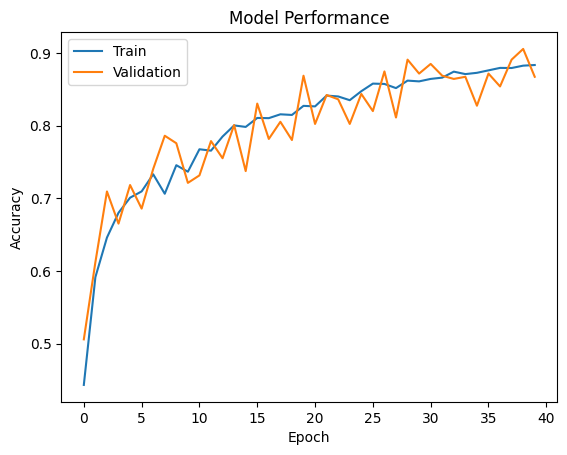

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Performance')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()


Saving image test.png to image test (2).png
1/1 [==============================] - 0s 19ms/step
Filename: image test.png
Predicted Class: Textiles_Textiles
Prediction Scores: [0. 0. 0. 0. 1.]


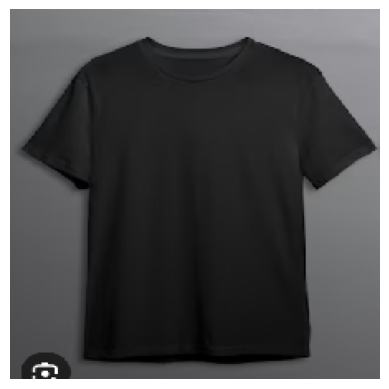

In [20]:
uploaded = files.upload()

class_labels = ['Glass_ClearGlass', 'Metal_AluminiumCans',
                'Paper_Paper', 'Plastic_PET', 'Textiles_Textiles'] 

'''class_labels = ['AHP_AHP', 'Composite_CompositeFnBCarton', 'Composite_Matresses',
                'Glass_BrownGlass', 'Glass_ClearGlass', 'Glass_GreenGlass',
                'IronMetal_StainlessSteel', 'IronMetal_Steel', 'Metal_AluminiumCans',
                'NonIronMetal_AlumuniumNonCan', 'NonIronMetal_Wiring', 'Paper_Cardboard',
                'Paper_Paper', 'Plastic_HDPEM', 'Plastic_PET', 'Textiles_Footwear',
                'Textiles_Textiles'] '''#Original complete version

for fn in uploaded.keys():
    # Predicting images
    path = fn
    img = load_img(path, target_size=(224, 224))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    predictions = model.predict(images, batch_size=10)
    predicted_class_index = np.argmax(predictions[0])
    predicted_label = class_labels[predicted_class_index]

    print("Filename:", fn)
    print("Predicted Class:", predicted_label)
    print("Prediction Scores:", predictions[0])

    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [21]:
#generate saved model
export_dir = 'saved_model/1'

tf.saved_model.save(model, export_dir)

In [22]:
#convert savedmodel to TFLite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model = converter.convert()

In [26]:
tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)

122808

In [27]:
#download TFLite model
try:
    from google.colab import files
    files.download(tflite_model_file)
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>